## *Churn Prediction*

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
pip install pandas matplotlib seaborn

In [ ]:
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
df = df.drop(columns=columns_to_drop)

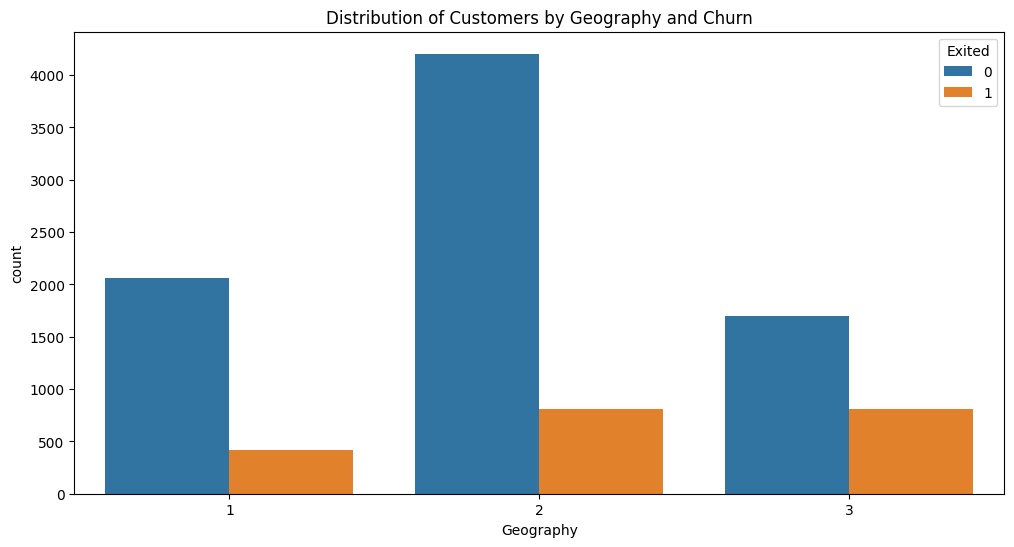

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x='Geography', data=df, hue='Exited')
plt.title('Distribution of Customers by Geography and Churn')
plt.show()

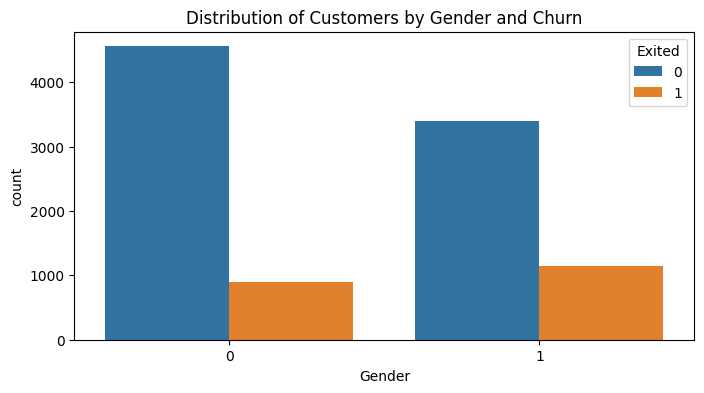

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Gender', data=df, hue='Exited')
plt.title('Distribution of Customers by Gender and Churn')
plt.show()

*Stacked Bar Plot for Categorical Variables vs. Churn*





In [ ]:
cat_vars = ['Geography', 'Gender']
for var in cat_vars:
    plt.figure(figsize=(10, 6))
    pd.crosstab(df[var], df['Exited']).plot(kind='bar', stacked=True)
    plt.title(f'Stacked Bar Plot of {var} vs. Churn')
    plt.show()

*Pie Chart for Proportion of Active Members*


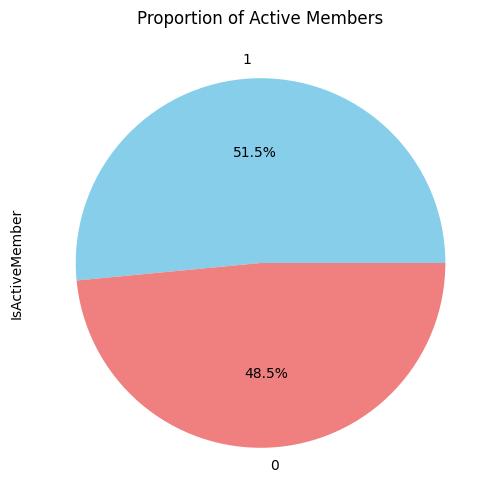

In [ ]:
plt.figure(figsize=(6, 6))
df['IsActiveMember'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Proportion of Active Members')
plt.show()

*Scatter Plot for Balance vs. Age*


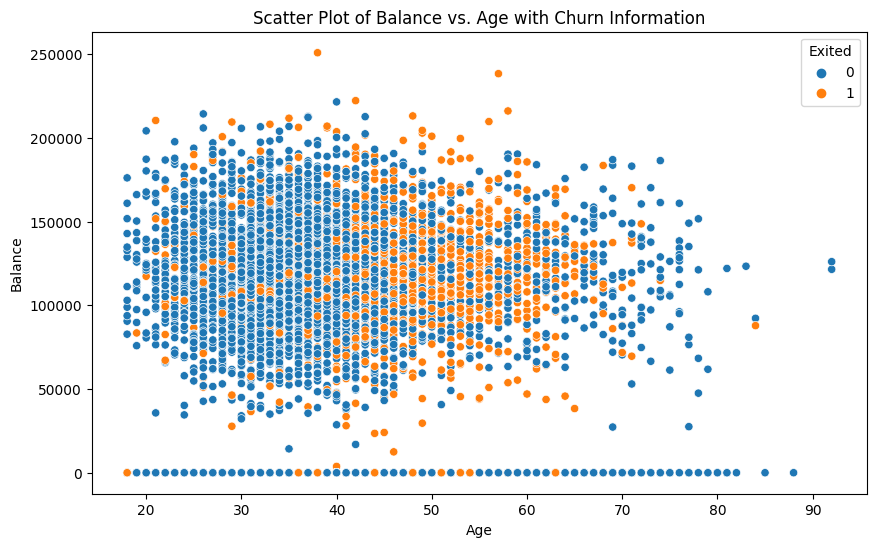

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Balance', hue='Exited', data=df)
plt.title('Scatter Plot of Balance vs. Age with Churn Information')
plt.show()

*Violin Plot for Age and Gender*

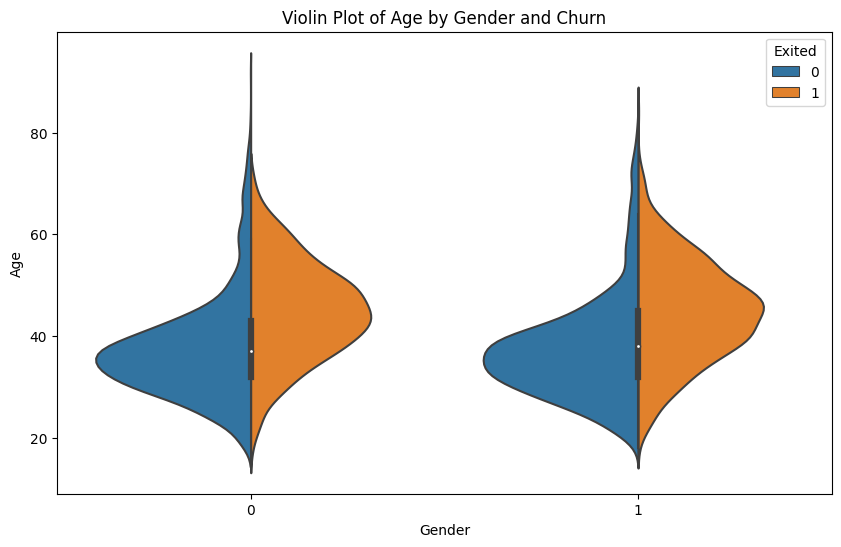

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Age', hue='Exited', data=df, split=True)
plt.title('Violin Plot of Age by Gender and Churn')
plt.show()

*Pair Plot*


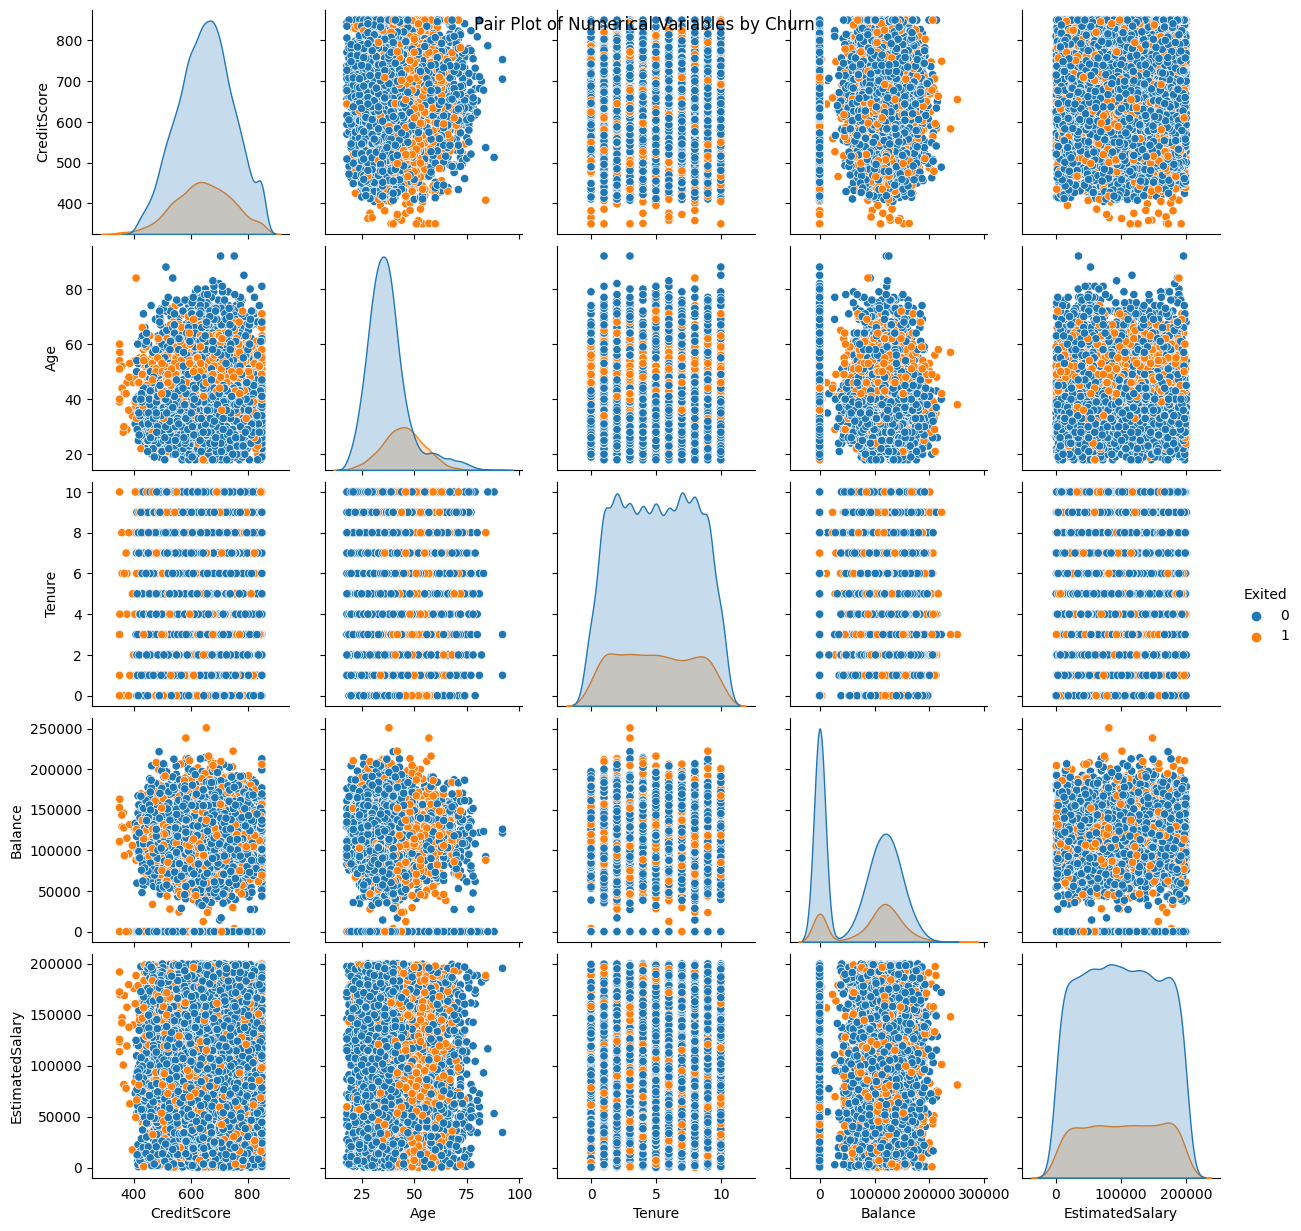

In [ ]:
sns.pairplot(df[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Exited']], hue='Exited')
plt.suptitle('Pair Plot of Numerical Variables by Churn')
plt.show()

*Box Plot for Numerical Variables vs. Churn*


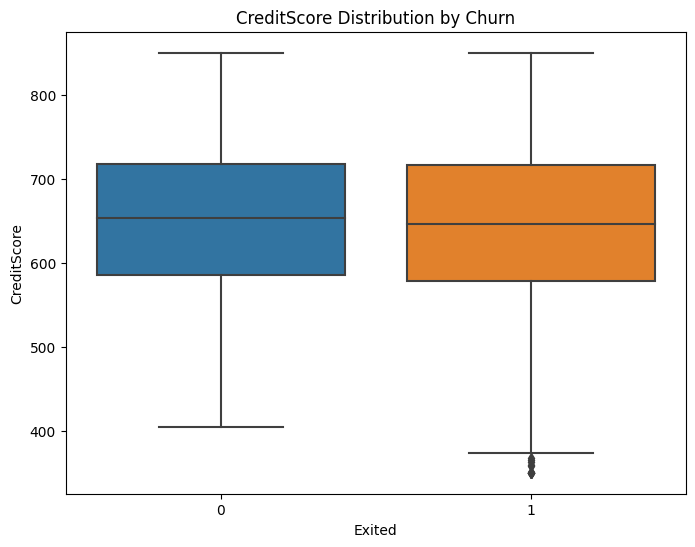

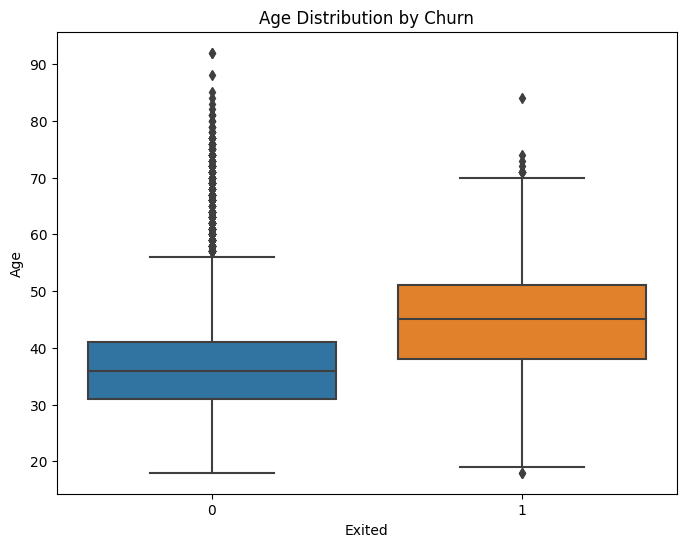

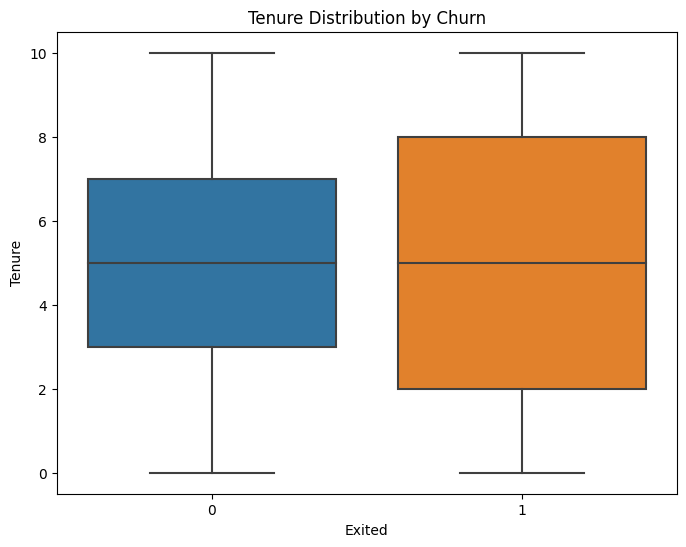

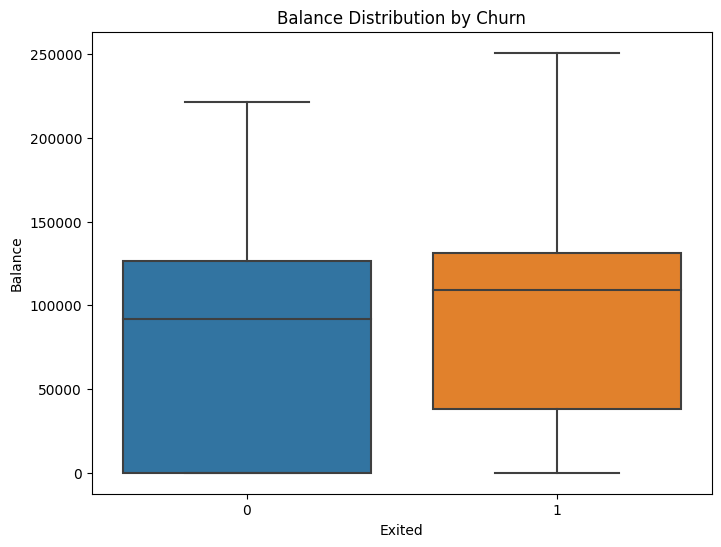

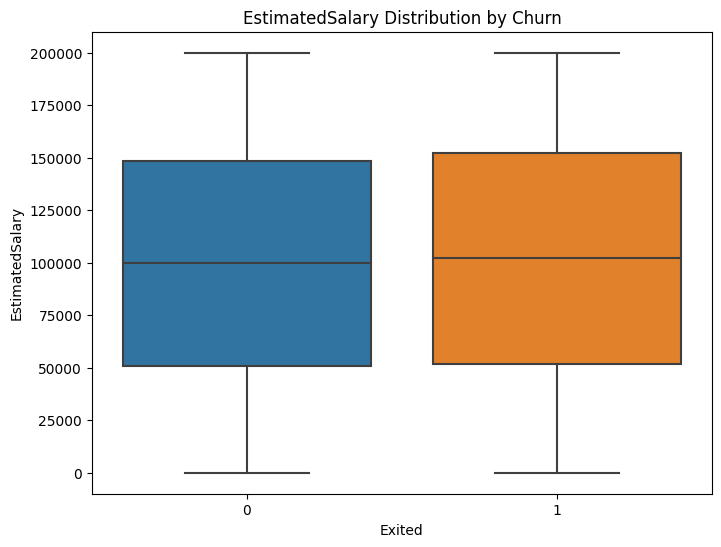

In [ ]:
num_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
for var in num_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Exited', y=var, data=df)
    plt.title(f'{var} Distribution by Churn')
    plt.show()

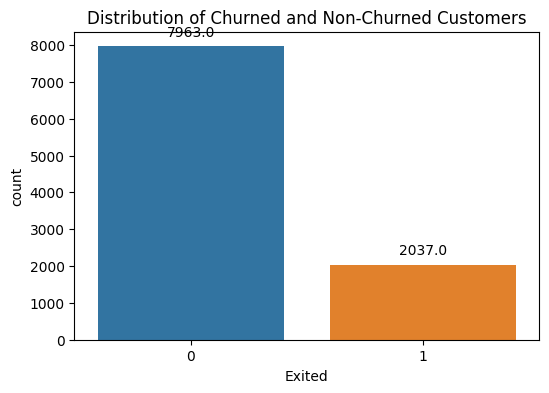

In [ ]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Exited', data=df)
plt.title('Distribution of Churned and Non-Churned Customers')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


*Histogram for Numerical Variables*

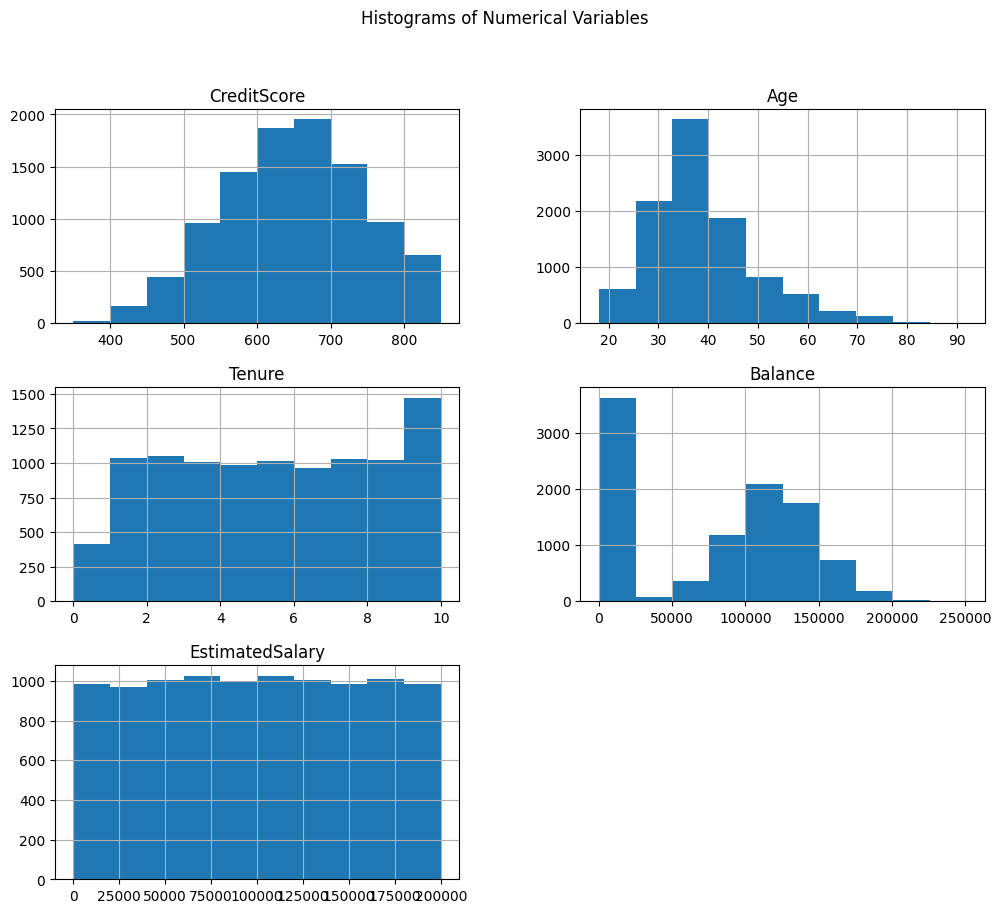

In [ ]:
df[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']].hist(figsize=(12, 10))
plt.suptitle('Histograms of Numerical Variables')
plt.show()

*Correlation Matrix Heatmap*


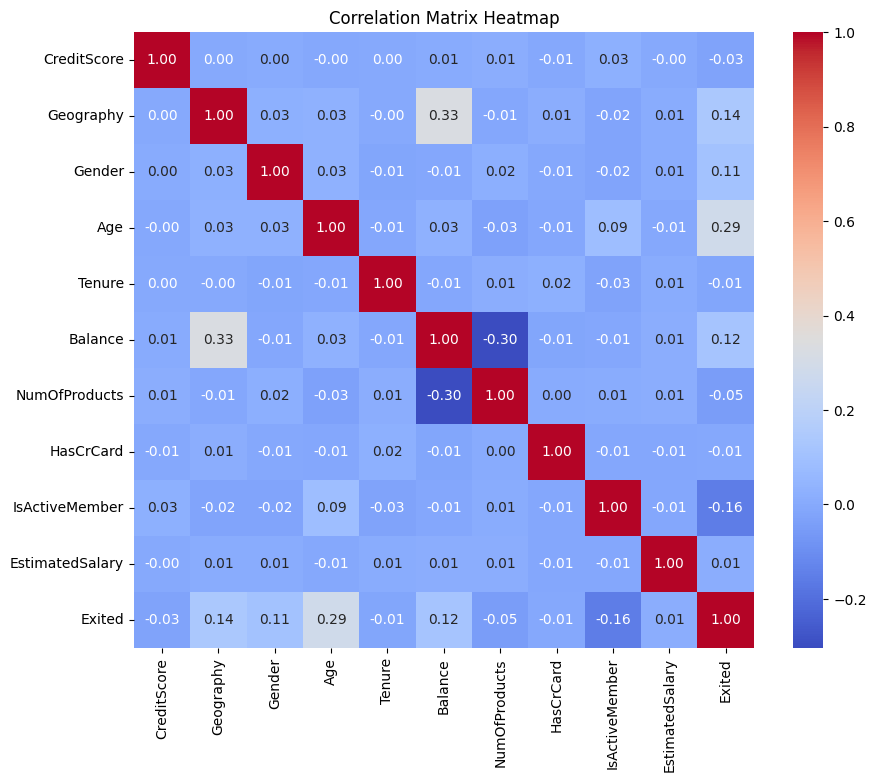

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
pip install imbalanced-learn

*Scaling the values*

In [ ]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['CreditScore', 'Tenure', 'Balance', 'EstimatedSalary','NumOfProducts']
scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

print(df.head())

   RowNumber  CustomerId   Surname  CreditScore  Gender  Age  Tenure  \
0          1    15634602  Hargrave        0.538       1   42     0.2   
1          2    15647311      Hill        0.516       1   41     0.1   
2          3    15619304      Onio        0.304       1   42     0.8   
3          4    15701354      Boni        0.698       1   39     0.1   
4          5    15737888  Mitchell        1.000       1   43     0.2   

    Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0  0.000000       0.000000          1               1         0.506735   
1  0.334031       0.000000          0               1         0.562709   
2  0.636357       0.666667          1               0         0.569654   
3  0.000000       0.333333          0               0         0.469120   
4  0.500246       0.000000          1               1         0.395400   

   Exited  Geography_Germany  Geography_Spain  
0       1                  0                0  
1       0                 

*Oversampling*

In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop('Exited', axis=1)
y = df['Exited']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Exited')], axis=1)

print(df_resampled.head())

   CreditScore  Gender  Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0        0.538       1   42     0.2  0.000000              1          1   
1        0.516       1   41     0.1  0.334031              1          0   
2        0.304       1   42     0.8  0.636357              3          1   
3        0.698       1   39     0.1  0.000000              2          0   
4        1.000       1   43     0.2  0.500246              1          1   

   IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  Exited  
0               1         0.506735                  0                0       1  
1               1         0.562709                  0                1       0  
2               0         0.569654                  0                0       1  
3               0         0.469120                  0                0       0  
4               1         0.395400                  0                1       0  


*Training the model*

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("\nRandom Forest Confusion Matrix:")
print(conf_matrix_rf)
print("\nRandom Forest Classification Report:")
print(classification_rep_rf)


Random Forest Accuracy: 0.8908

Random Forest Confusion Matrix:
[[1440  193]
 [ 155 1398]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1633
           1       0.88      0.90      0.89      1553

    accuracy                           0.89      3186
   macro avg       0.89      0.89      0.89      3186
weighted avg       0.89      0.89      0.89      3186



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")
print("\nGradient Boosting Confusion Matrix:")
print(conf_matrix_gb)
print("\nGradient Boosting Classification Report:")
print(classification_rep_gb)


Gradient Boosting Accuracy: 0.8870

Gradient Boosting Confusion Matrix:
[[1496  137]
 [ 223 1330]]

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1633
           1       0.91      0.86      0.88      1553

    accuracy                           0.89      3186
   macro avg       0.89      0.89      0.89      3186
weighted avg       0.89      0.89      0.89      3186

